<a href="https://colab.research.google.com/github/Julia-Vanyarina/etl_lab_3_1/blob/main/3_1%D0%92%D0%B0%D0%BD%D1%8F%D1%80%D0%B8%D0%BD%D0%B0_%D0%AE_%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 15.
Интеграция данных о недвижимости:
-	MySQL база данных объектов.
-	Excel файл с оценкой состояния.
-	CSV файл с историей арендных платежей.
Задача: оценить эффективность управления недвижимостью.




---



---



⏬


# **Подготовка к работе**  🕑

**Генерация данных  для 3 разных источников**

1. Генерация данных для Excel файла (оценка_состояния.xlsx)

In [8]:
import pandas as pd
import numpy as np

# Список различных названий улиц
streets = [
    'Ленина', 'Мира', 'Пушкина', 'Гагарина', 'Космонавтов', 'Садовая', 'Лесная', 'Победы',
    'Центральная', 'Молодежная', 'Советская', 'Кирова', 'Лермонтова', 'Чехова', 'Горького',
    'Дзержинского', 'Калинина', 'Фрунзе', 'Чапаева', 'Щорса', 'Жукова', 'Суворова', 'Кутузова',
    'Некрасова', 'Толстого', 'Достоевского', 'Гоголя', 'Тургенева', 'Маяковского', 'Есенина'
]

# Генерация данных
data = {
    'id_object': np.random.randint(1, 101, 300),  # Случайные id объектов (от 1 до 100)
    'mark': np.random.randint(1, 6, 300),  # Оценка состояния от 1 до 5
    'date_mark': pd.to_datetime(np.random.choice(pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'), 300))  # Случайные даты оценки
}

# Создание DataFrame
df_excel = pd.DataFrame(data)

# Сохранение в Excel
df_excel.to_excel('оценка_состояния.xlsx', index=False)

2. Генерация данных для SQL файла (объекты_недвижимости.sql)

In [9]:
import pandas as pd
import numpy as np

# Список различных названий улиц
streets = [
    'Ленина', 'Мира', 'Пушкина', 'Гагарина', 'Космонавтов', 'Садовая', 'Лесная', 'Победы',
    'Центральная', 'Молодежная', 'Советская', 'Кирова', 'Лермонтова', 'Чехова', 'Горького',
    'Дзержинского', 'Калинина', 'Фрунзе', 'Чапаева', 'Щорса', 'Жукова', 'Суворова', 'Кутузова',
    'Некрасова', 'Толстого', 'Достоевского', 'Гоголя', 'Тургенева', 'Маяковского', 'Есенина'
]

# Генерация данных
data = {
    'адрес': [f'ул. {np.random.choice(streets)}, {i}' for i in range(1, 301)],  # Случайные названия улиц
    'тип_объекта': np.random.choice(['жилой дом', 'офисное здание', 'склад', 'торговый центр'], 300),  # Типы объектов
    'площадь': np.random.uniform(50, 1500, 300).round(2),  # Площадь объектов
    'дата_постройки': pd.to_datetime(np.random.choice(pd.date_range(start='1950-01-01', end='2023-12-31', freq='D'), 300))  # Случайные даты постройки
}

# Создание DataFrame
df_sql = pd.DataFrame(data)

# Генерация SQL-запросов
sql_queries = []
for _, row in df_sql.iterrows():
    sql_queries.append(
        f"('{row['адрес']}', '{row['тип_объекта']}', {row['площадь']}, '{row['дата_постройки'].strftime('%Y-%m-%d')}')"
    )

# Сохранение в SQL файл
with open('объекты_недвижимости.sql', 'w', encoding='utf-8') as f:
    f.write("CREATE TABLE объекты_недвижимости (\n")
    f.write("    id INT PRIMARY KEY AUTO_INCREMENT,\n")
    f.write("    адрес VARCHAR(255) NOT NULL,\n")
    f.write("    тип_объекта VARCHAR(50) NOT NULL,\n")
    f.write("    площадь DECIMAL(10, 2) NOT NULL,\n")
    f.write("    дата_постройки DATE NOT NULL\n")
    f.write(");\n\n")
    f.write("INSERT INTO объекты_недвижимости (адрес, тип_объекта, площадь, дата_постройки) VALUES\n")
    f.write(",\n".join(sql_queries) + ";\n")

3.Генерация данных для CSV файла (арендные_платежи.csv)

In [10]:
import pandas as pd
import numpy as np

# Генерация данных
data = {
    'id': range(1, 301),  # Уникальные идентификаторы
    'id_объекта': np.random.randint(1, 100, 300),  # Ссылка на объект недвижимости
    'дата_платежа': pd.date_range(start='2023-01-01', periods=300, freq='D'),  # Даты платежей
    'сумма_платежа': np.random.randint(30000, 80000, 300),  # Суммы платежей
    'статус_оплаты': np.random.choice(['оплачено', 'не оплачено'], 300)  # Статус оплаты
}

# Создание DataFrame
df_csv = pd.DataFrame(data)

# Сохранение в CSV
df_csv.to_csv('арендные_платежи.csv', index=False)

# **Загрузка и предобработка данных** ♻

In [11]:
ls

sample_data/  арендные_платежи.csv  объекты_недвижимости.sql  оценка_состояния.xlsx


In [12]:
!pip install pandas numpy openpyxl mysql-connector-python sqlalchemy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import mysql.connector

# from google.colab import files
# uploaded = files.upload()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 50.1 MB/s eta 0:00:00


In [13]:
df_excel = pd.read_excel('оценка_состояния.xlsx')

df_csv = pd.read_csv('арендные_платежи.csv')

# Подключение к MySQL
conn = mysql.connector.connect(
    host="95.131.149.21",
    user="mgpu_ico_etl_15",
    password="K8DQAKTc",
    database="mgpu_ico_etl_15"
)

df_mysql = pd.read_sql("SELECT * FROM объекты_недвижимости", conn)

# Закрытие соединения
conn.close()

<ipython-input-13-735a11d23918>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mysql = pd.read_sql("SELECT * FROM объекты_недвижимости", conn)


### **обработка df_excel**

In [14]:
df_excel.head()

,id_object,mark,date_mark
0,37,1,2023-08-22
1,6,3,2023-03-13
2,68,2,2023-10-26
3,89,1,2023-12-01
4,35,2,2023-12-26


In [15]:
df_excel.describe()

,id_object,mark,date_mark
count,300.000000,300.00000,300
mean,48.776667,2.99000,2023-06-30 15:40:48
min,1.000000,1.00000,2023-01-02 00:00:00
25%,23.750000,2.00000,2023-04-03 00:00:00
50%,46.000000,3.00000,2023-07-11 00:00:00
75%,73.000000,4.00000,2023-09-28 00:00:00
max,100.000000,5.00000,2023-12-28 00:00:00
std,29.449125,1.43647,NaN


In [16]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id_object  300 non-null    int64         
 1   mark       300 non-null    int64         
 2   date_mark  300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 7.2 KB


In [17]:
df_excel = df_excel.drop_duplicates()  # Удаление дубликатов

### **обработка df_csv**

In [18]:
df_csv.head()

,id,id_объекта,дата_платежа,сумма_платежа,статус_оплаты
0,1,64,2023-01-01,36980,не оплачено
1,2,83,2023-01-02,36972,оплачено
2,3,67,2023-01-03,55614,оплачено
3,4,90,2023-01-04,64423,не оплачено
4,5,5,2023-01-05,60842,не оплачено


In [19]:
df_csv.describe()

,id,id_объекта,сумма_платежа
count,300.000000,300.000000,300.000000
mean,150.500000,52.440000,53963.206667
std,86.746758,28.372223,14279.541600
min,1.000000,1.000000,30328.000000
25%,75.750000,30.000000,41223.250000
50%,150.500000,54.500000,53029.000000
75%,225.250000,77.000000,66469.500000
max,300.000000,99.000000,79547.000000


In [20]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             300 non-null    int64 
 1   id_объекта     300 non-null    int64 
 2   дата_платежа   300 non-null    object
 3   сумма_платежа  300 non-null    int64 
 4   статус_оплаты  300 non-null    object
dtypes: int64(3), object(2)
memory usage: 11.8+ KB


In [21]:
df_csv['дата_платежа'] = pd.to_datetime(df_csv['дата_платежа'])

In [22]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             300 non-null    int64         
 1   id_объекта     300 non-null    int64         
 2   дата_платежа   300 non-null    datetime64[ns]
 3   сумма_платежа  300 non-null    int64         
 4   статус_оплаты  300 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 11.8+ KB


### **обработка df_mysql**

In [23]:
df_mysql.head()

,id,адрес,тип_объекта,площадь,дата_постройки
0,1,"ул. Пушкина, 1",торговый центр,982.96,2004-07-08
1,2,"ул. Толстого, 2",торговый центр,1320.56,1989-09-27
2,3,"ул. Лесная, 3",торговый центр,1326.79,1985-08-18
3,4,"ул. Мира, 4",склад,133.33,1984-06-21
4,5,"ул. Гоголя, 5",жилой дом,541.16,1973-07-18


In [24]:
df_mysql.describe()

,id,площадь
count,300.000000,300.000000
mean,150.500000,776.602500
std,86.746758,423.572519
min,1.000000,52.480000
25%,75.750000,425.850000
50%,150.500000,757.945000
75%,225.250000,1123.210000
max,300.000000,1498.060000


In [25]:
df_mysql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              300 non-null    int64  
 1   адрес           300 non-null    object 
 2   тип_объекта     300 non-null    object 
 3   площадь         300 non-null    float64
 4   дата_постройки  300 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.8+ KB


In [26]:
df_mysql['дата_постройки'] = pd.to_datetime(df_mysql['дата_постройки'])  # Преобразование даты

In [27]:
df_mysql.isna()

,id,адрес,тип_объекта,площадь,дата_постройки
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
295,False,False,False,False,False
296,False,False,False,False,False
297,False,False,False,False,False
298,False,False,False,False,False


### **Объединение данных**

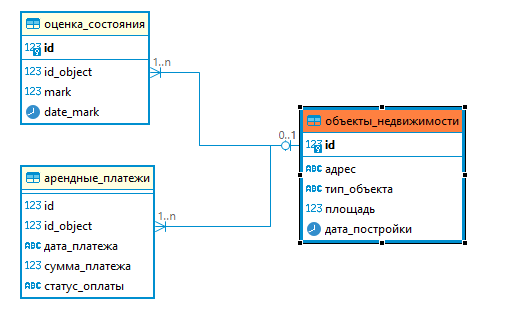

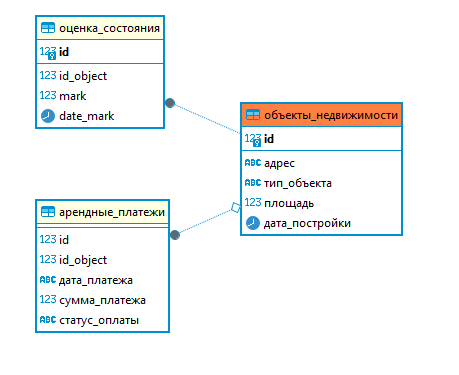

In [93]:
merged_df = pd.merge(df_mysql, df_excel, left_on='id', right_on='id_object', how='inner')
merged_df = pd.merge(merged_df, df_csv, left_on='id', right_on='id_объекта', how='inner')

merged_df = merged_df[[
    'адрес', 'тип_объекта', 'площадь', 'дата_постройки',
    'mark', 'date_mark', 'дата_платежа', 'сумма_платежа', 'статус_оплаты'
]]
print(merged_df.head())

            адрес     тип_объекта  площадь дата_постройки  mark  date_mark  \
0  ул. Пушкина, 1  торговый центр   982.96     2004-07-08     3 2023-12-18   
1  ул. Пушкина, 1  торговый центр   982.96     2004-07-08     3 2023-12-18   
2  ул. Пушкина, 1  торговый центр   982.96     2004-07-08     3 2023-05-13   
3  ул. Пушкина, 1  торговый центр   982.96     2004-07-08     3 2023-05-13   
4  ул. Пушкина, 1  торговый центр   982.96     2004-07-08     3 2023-08-07   

  дата_платежа  сумма_платежа статус_оплаты  
0   2023-04-03          40873   не оплачено  
1   2023-07-02          55183      оплачено  
2   2023-04-03          40873   не оплачено  
3   2023-07-02          55183      оплачено  
4   2023-04-03          40873   не оплачено  


In [94]:
from tabulate import tabulate

merged_df_ozenka = pd.merge(df_mysql, df_excel, left_on='id', right_on='id_object', how='inner')
merged_df_ozenka = pd.merge(merged_df_ozenka, df_csv, left_on='id', right_on='id_объекта', how='inner')

result_df = merged_df_ozenka.groupby(['дата_платежа', 'сумма_платежа', 'статус_оплаты']).agg(
    адрес=('адрес', 'first'),
    тип_объекта=('тип_объекта', 'first'),
    площадь=('площадь', 'first'),
    дата_постройки=('дата_постройки', 'first'),
    средняя_оценка=('mark', 'mean'),
    последняя_дата_оценки=('date_mark', 'max')
).reset_index()

result_df['средняя_оценка'] = result_df['средняя_оценка'].round(2)

novaya_table = (
    result_df.head(30)
    .style
    .format('{:.2f}', subset=['средняя_оценка'])
    .format({
        'адрес': lambda x: x.upper(),  # верхний регистр
        'тип_объекта': lambda x: x.lower(),  # нижний регистр
        'статус_оплаты': lambda x: '✅' if x == 'оплачено' else '❌'  # статуса оплаты в виде картинки
    })
    .bar(subset=['средняя_оценка'],  # заполнение оценки
         align='mid',
         color=['#ffcccc', '#ccffcc'],
         vmin=result_df['средняя_оценка'].min(),
         vmax=result_df['средняя_оценка'].max())
    .set_properties(**{'text-align': 'center'})  #\по центру
)

novaya_table

,дата_платежа,сумма_платежа,статус_оплаты,адрес,тип_объекта,площадь,дата_постройки,средняя_оценка,последняя_дата_оценки
0,2023-01-01 00:00:00,36980,❌,"УЛ. ЩОРСА, 64",офисное здание,666.900000,2008-03-03 00:00:00,3.330000,2023-10-19 00:00:00
1,2023-01-03 00:00:00,55614,✅,"УЛ. ЩОРСА, 67",офисное здание,539.330000,2015-03-27 00:00:00,5.000000,2023-10-24 00:00:00
2,2023-01-04 00:00:00,64423,❌,"УЛ. КИРОВА, 90",торговый центр,310.510000,1950-10-14 00:00:00,4.200000,2023-12-19 00:00:00
3,2023-01-05 00:00:00,60842,❌,"УЛ. ГОГОЛЯ, 5",жилой дом,541.160000,1973-07-18 00:00:00,2.670000,2023-09-14 00:00:00
4,2023-01-06 00:00:00,73110,❌,"УЛ. ЩОРСА, 86",торговый центр,163.530000,2014-06-05 00:00:00,2.800000,2023-11-24 00:00:00
5,2023-01-07 00:00:00,56621,❌,"УЛ. ГОГОЛЯ, 98",офисное здание,837.560000,1979-07-01 00:00:00,2.000000,2023-10-12 00:00:00
6,2023-01-08 00:00:00,69718,❌,"УЛ. ТОЛСТОГО, 81",торговый центр,83.680000,2015-07-16 00:00:00,4.000000,2023-04-25 00:00:00
7,2023-01-11 00:00:00,45034,❌,"УЛ. ТОЛСТОГО, 25",торговый центр,735.930000,2001-04-29 00:00:00,2.000000,2023-08-24 00:00:00
8,2023-01-12 00:00:00,54304,❌,"УЛ. ЧЕХОВА, 74",жилой дом,317.110000,1984-12-27 00:00:00,5.000000,2023-04-29 00:00:00
9,2023-01-13 00:00:00,56461,✅,"УЛ. СУВОРОВА, 78",жилой дом,796.420000,1957-01-17 00:00:00,2.330000,2023-10-14 00:00:00


# **Анализ и визуализация данных** 📈

In [92]:
# сред. оценка состояния объектов
mean_rating = merged_df['mark'].mean()
print(f"сред. оценка состояния объектов: {mean_rating:.2f}")

# сумма аренды
total_rent = merged_df['сумма_платежа'].sum()
print(f"сумма аренды: {total_rent} руб.")

#оплач. и неоплач. платежи
payment_status = merged_df['статус_оплаты'].value_counts()
print("Статус оплаты:")
print(payment_status)

#Средняя оценка состояния по типам объектов
mean_rating_by_type = merged_df.groupby('тип_объекта')['mark'].mean()
print("\nСредняя оценка состояния по типам объектов:")
print(mean_rating_by_type)

#Общая сумма арендных платежей по типам объектов
total_rent_by_type = merged_df.groupby('тип_объекта')['сумма_платежа'].sum()
print("\nОбщая сумма арендных платежей по типам объектов:")
print(total_rent_by_type)

#Количество объектов по типам
object_count_by_type = merged_df['тип_объекта'].value_counts()
print("\nКоличество объектов по типам:")
print(object_count_by_type)

#Средняя сумма платежа по статусу оплаты
mean_payment_by_status = merged_df.groupby('статус_оплаты')['сумма_платежа'].mean()
print("\nСредняя сумма платежа по статусу оплаты:")
print(mean_payment_by_status)

сред. оценка состояния объектов: 2.92
сумма аренды: 48648663 руб.
Статус оплаты:
статус_оплаты
оплачено       449
не оплачено    441
Name: count, dtype: int64

Средняя оценка состояния по типам объектов:
тип_объекта
жилой дом         2.984906
офисное здание    2.663415
склад             3.074074
торговый центр    2.952381
Name: mark, dtype: float64

Общая сумма арендных платежей по типам объектов:
тип_объекта
жилой дом         14211312
офисное здание    11462939
склад             10207812
торговый центр    12766600
Name: сумма_платежа, dtype: int64

Количество объектов по типам:
тип_объекта
жилой дом         265
торговый центр    231
офисное здание    205
склад             189
Name: count, dtype: int64

Средняя сумма платежа по статусу оплаты:
статус_оплаты
не оплачено    56496.111111
оплачено       52859.416481
Name: сумма_платежа, dtype: float64


🔍

Состояние объектов:
Средняя оценка: 2.92 (удовлетворительно, но требует улучшений).
Лучший показатель: Склады (3.07).
Худший показатель: Офисные здания (2.66).
Следовательно, офисные здания нуждаются в срочном ремонте и улучшении.

Арендные платежи:
   Общий доход: 48 648 663 руб..
   Неоплаченные платежи: 441 из 890 (почти половина).
   Средняя сумма неоплаченных платежей: 56 496 руб. (выше, чем оплаченные).
   Проблемы с взысканием арендной платы

Анализ по типам объектов
   - Наибольший доход: Жилые дома (14 211 312 руб.).
   - Наименьший доход: Склады (10 207 812 руб.).
   - Больше всего объектов: Жилые дома (265).
  Жилые дома приносят наибольший доход,монжо связать с их кол-ом

Эффективность управления
   Плюсы: Высокий общий доход, удовлетворительное состояние объектов.
   Минусы: Плохое состояние офисных зданий, высокий уровень неоплаченных платежей.


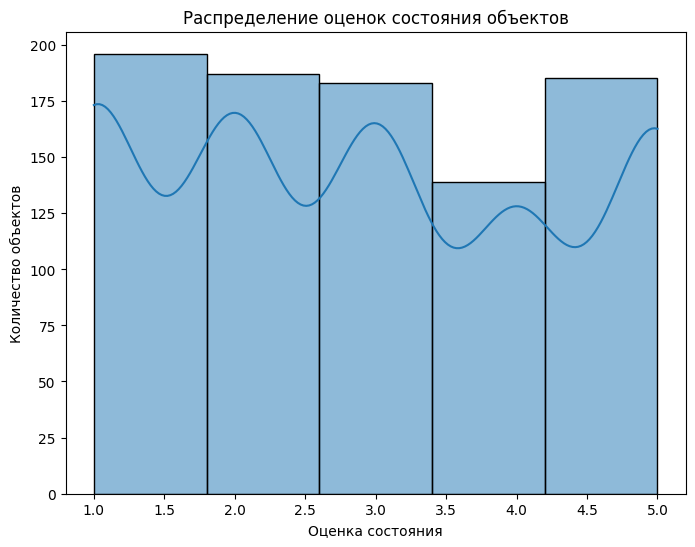

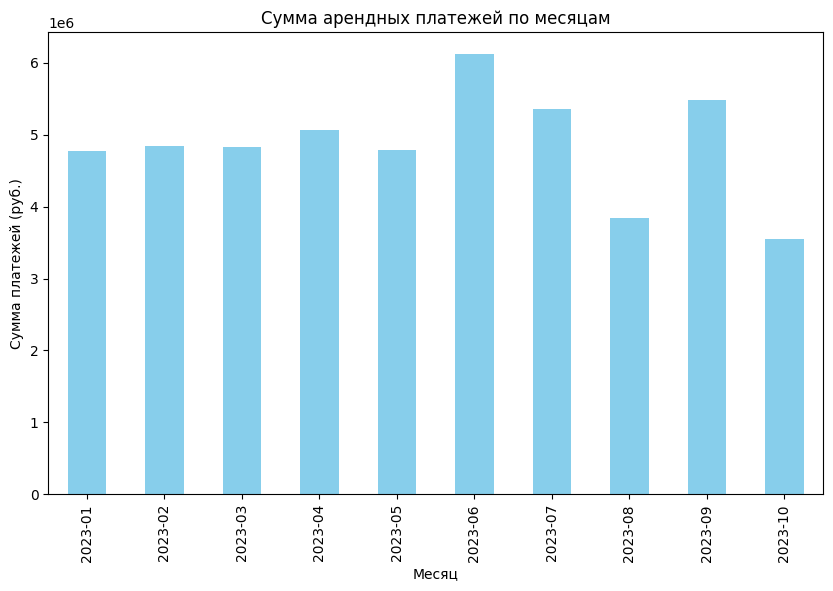

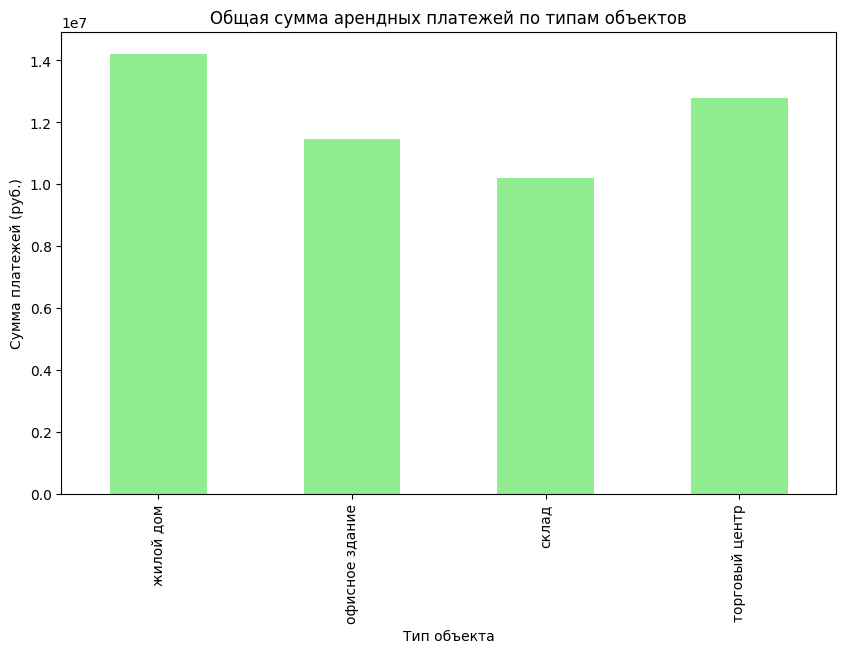

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

#распределение оценок состояния
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['mark'], bins=5, kde=True)
plt.title('Распределение оценок состояния объектов')
plt.xlabel('Оценка состояния')
plt.ylabel('Количество объектов')
plt.show()

# Визуализация суммы арендных платежей по месяцам
merged_df['месяц'] = merged_df['дата_платежа'].dt.to_period('M')
monthly_rent = merged_df.groupby('месяц')['сумма_платежа'].sum()

plt.figure(figsize=(10, 6))
monthly_rent.plot(kind='bar', color='skyblue')
plt.title('Сумма арендных платежей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма платежей (руб.)')
plt.show()


# Визуализация общей суммы арендных платежей по типам объектов
total_rent_by_type = merged_df.groupby('тип_объекта')['сумма_платежа'].sum()

plt.figure(figsize=(10, 6))
total_rent_by_type.plot(kind='bar', color='lightgreen')
plt.title('Общая сумма арендных платежей по типам объектов')
plt.xlabel('Тип объекта')
plt.ylabel('Сумма платежей (руб.)')
plt.show()

Динамика оплаты по месяцам:
статус_оплаты  не оплачено  оплачено
месяц                               
2023-01                 56        27
2023-02                 33        50
2023-03                 54        37
2023-04                 64        32
2023-05                 24        65
2023-06                 57        46
2023-07                 41        50
2023-08                 36        46
2023-09                 47        52
2023-10                 29        44


<Figure size 1200x600 with 0 Axes>

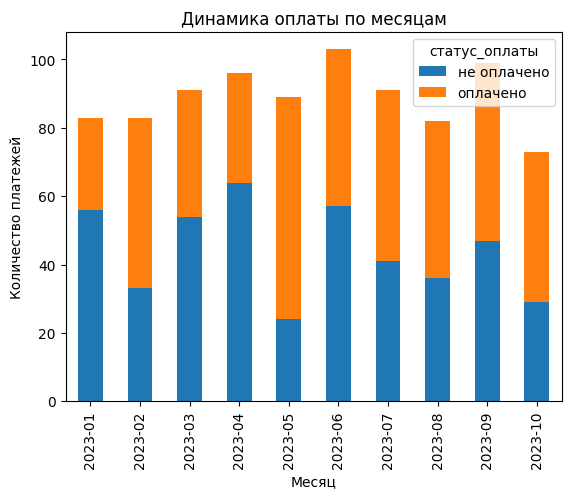

In [76]:
#оплата по месяцам
merged_df['месяц'] = merged_df['дата_платежа'].dt.to_period('M')
payment_status_by_month = merged_df.groupby(['месяц', 'статус_оплаты']).size().unstack()

print("Динамика оплаты по месяцам:")
print(payment_status_by_month)

plt.figure(figsize=(12, 6))
payment_status_by_month.plot(kind='bar', stacked=True)
plt.title('Динамика оплаты по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество платежей')
plt.show()

*Количество оплаченных платежей в среднем превышает количество неоплаченных, но в некоторые месяцы (январь, март, апрель, июнь) неоплаченных платежей больше*

# ⚡ ⚡ ⚡

> (перевод блокнота в пдф для отчёта)



In [87]:
!apt-get install pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-luatex pandoc-citeproc context wkhtmltopdf librsvg2-bin groff ghc nodejs php python
  libjs-mathjax libjs-katex citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pandoc-

In [83]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra texlive-latex-recommended
  texlive-pictures tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logk

In [89]:
!pandoc --version

pandoc 2.9.2.1
Compiled with pandoc-types 1.20, texmath 0.12.0.2, skylighting 0.8.5
Default user data directory: /root/.local/share/pandoc or /root/.pandoc
Copyright (C) 2006-2020 John MacFarlane
Web:  https://pandoc.org
This is free software; see the source for copying conditions.
There is no warranty, not even for merchantability or fitness
for a particular purpose.


In [48]:
     from google.colab import drive
     drive.flush_and_unmount()



In [49]:
   from google.colab import drive
   drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [78]:
   %cd /content/gdrive/MyDrive/Colab\ Notebooks/

/content/gdrive/MyDrive/Colab Notebooks


In [90]:
# Convert
!jupyter nbconvert --to pdf 3_1Ванярина_Ю.А.ipynb

[NbConvertApp] Converting notebook 3_1Ванярина_Ю.А.ipynb to pdf
[NbConvertApp] Support files will be in 3_1Ванярина_Ю.А_files/
[NbConvertApp] Making directory ./3_1Ванярина_Ю.А_files
[NbConvertApp] Writing 114400 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 188483 bytes to 3_1Ванярина_Ю.А.pdf


In [91]:
!ls

'01 10 практика на леции 2.ipynb'
 01_ex_Vanyarina_Julia.ipynb
'02-01-dictionaries-pandas-series (1).ipynb'
 02-01-dictionaries-pandas-series.ipynb
 02-1-ex_Vanyarina_Julia.ipynb
 02-2-ex_Vanyarina_Julia.ipynb
 03_2_hypothesis_testing.ipynb
'03-DescriptiveStatistics (1).ipynb'
'03-DescriptiveStatistics (2).ipynb'
 03-DescriptiveStatistics.ipynb
 04_1_LinearRegression1.ipynb
'10.09 практиканалекции.ipynb'
'17 09 практика на лекции.ipynb'
 22sparklogit_2.ipynb
 22sparkwordcount_1.ipynb
'24_Clustering2 ru (1).ipynb'
'24_Clustering2 ru.ipynb'
 3_1Ванярина_Ю.А.ipynb
 3_1Ванярина_Ю.А.pdf
 4_2_LinearRegression2.ipynb
'5_2_1_Введение_в_визуализацию_данных_с_помощью_Altair (1).ipynb'
 5_2_1_Введение_в_визуализацию_данных_с_помощью_Altair.ipynb
'5_2_2 Визуализация_данных_с_помощью_Altair (1).ipynb'
'5_2_2 Визуализация_данных_с_помощью_Altair.ipynb'
 6_lab_1Vanyarina_Julia.ipynb
'6 лабораторная'
 Classification_1_Decision_Trees.ipynb
 Classification_1_kNN.ipynb
'datahack2023(1)'
 datahack2023.ipy

# **ИСТОЧНИКИ**

https://habr.com/ru/articles/521894/

https://www.geeksforgeeks.org/seaborn-plots-in-a-loop-efficient-data-visualization-techniques/

https://www.geeksforgeeks.org/how-to-connect-python-with-sql-database/

https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Setting-styles


https://nbconvert.readthedocs.io/en/latest/install.html#installing-nbconvert